# <center><h1><b><font color ='#163361'> Oasis Alzheimer's Detection</b> </font> </h1><center>

![MRI-brain-Pexels-Anna-Shvets.jpg](MRI-brain-Pexels-Anna-Shvets.jpg)

# <b><font color ='#163361'> Import Libraries </b> </font>

In [183]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# <b><font color ='#163361'> Import Dataset </b> </font>

In [150]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  

In [151]:
path1 = path1[0:500]
path2 = path2[0:500]
path3 = path3[0:480]
path4 = path4[0:500]

# <b><font color ='#163361'> One Hot Encoder </b></font>

In [152]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [153]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [154]:
data = np.array(data)
data.shape

(1980, 128, 128, 3)

In [156]:
result = np.array(result)
result = result.reshape((1980,4))
result.shape

(1980, 4)

# <b><font color ='#163361'> Visualization For Classes </b></font>

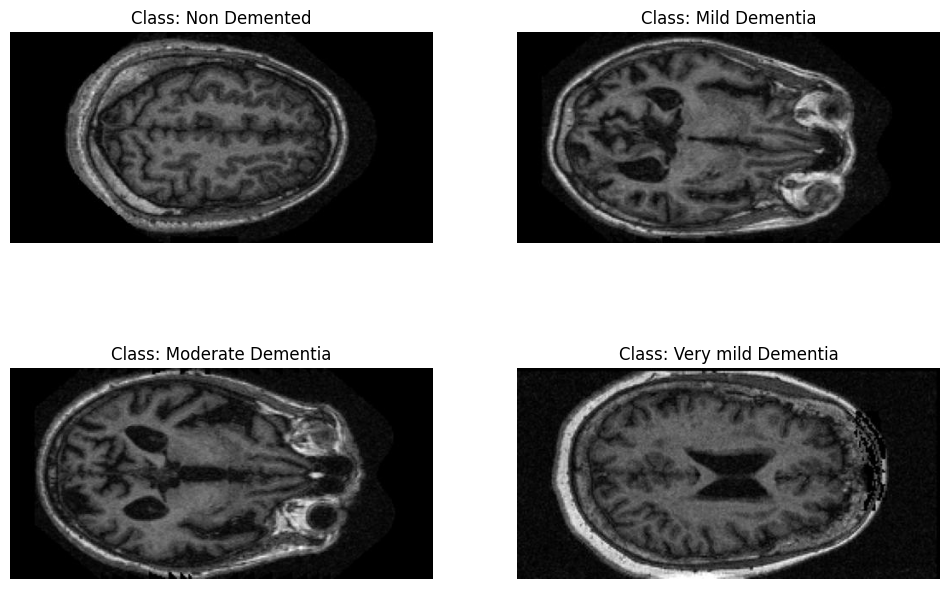

In [187]:
folders = ['/kaggle/input/imagesoasis/Data/Non Demented', '/kaggle/input/imagesoasis/Data/Mild Dementia', '/kaggle/input/imagesoasis/Data/Moderate Dementia', '/kaggle/input/imagesoasis/Data/Very mild Dementia'] 

plt.figure(figsize=(12, 8))
for i, folder_path in enumerate(folders, 1):
    folder_name = os.path.basename(folder_path)  
    image_files = os.listdir(folder_path)
    image_path = os.path.join(folder_path, image_files[0])  
    img = Image.open(image_path)
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Class: {folder_name}")  
    plt.axis('off')

plt.show()

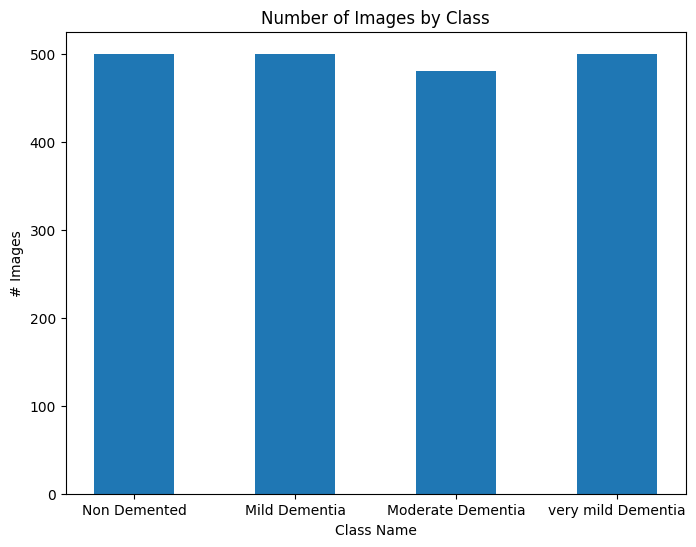

In [182]:
number_classes = {'Non Demented': len(path1),
'Mild Dementia': len(path2),
'Moderate Dementia': len(path3),
'very mild Dementia': len(path4)}
plt.figure(figsize=(8,6))
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

# <b><font color ='#163361'> Splitting The Data </b></font>

In [161]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

# <b><font color ='#163361'> Creating Model: CNN </b></font>

In [163]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 64)       

In [164]:
y_train.shape  

(1683, 4)

In [165]:
x_train.shape

(1683, 128, 128, 3)

In [166]:
history = model.fit(x_train,y_train,epochs=12,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/12
169/169 [==============================] - 118s 687ms/step - loss: 5.8871 - accuracy: 0.5134 - val_loss: 0.9559 - val_accuracy: 0.6532
Epoch 2/12
169/169 [==============================] - 117s 690ms/step - loss: 0.8141 - accuracy: 0.6679 - val_loss: 0.6803 - val_accuracy: 0.7037
Epoch 3/12
169/169 [==============================] - 117s 691ms/step - loss: 0.6403 - accuracy: 0.7302 - val_loss: 0.5657 - val_accuracy: 0.7441
Epoch 4/12
169/169 [==============================] - 116s 686ms/step - loss: 0.5238 - accuracy: 0.7790 - val_loss: 0.5504 - val_accuracy: 0.7609
Epoch 5/12
169/169 [==============================] - 117s 691ms/step - loss: 0.4569 - accuracy: 0.8206 - val_loss: 0.3743 - val_accuracy: 0.8519
Epoch 6/12
169/169 [==============================] - 116s 687ms/step - loss: 0.3981 - accuracy: 0.8360 - val_loss: 0.3744 - val_accuracy: 0.8384
Epoch 7/12
169/169 [==============================] - 116s 689ms/step - loss: 0.3213 - accuracy: 0.8616 - val_loss: 0.3621 -

In [167]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 3s 290ms/step - loss: 0.3002 - accuracy: 0.8855


[0.300228476524353, 0.8855218887329102]

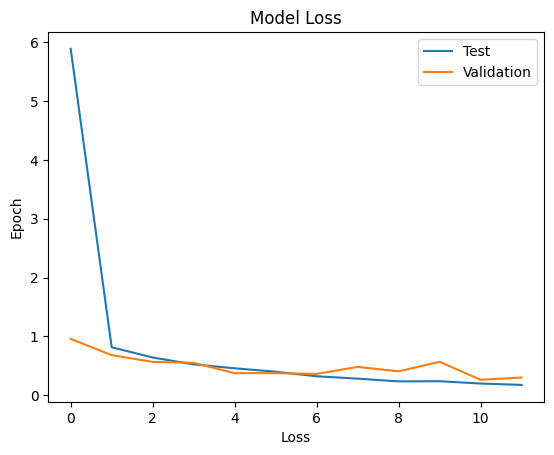

In [168]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

10/10 [==============================] - 3s 289ms/step


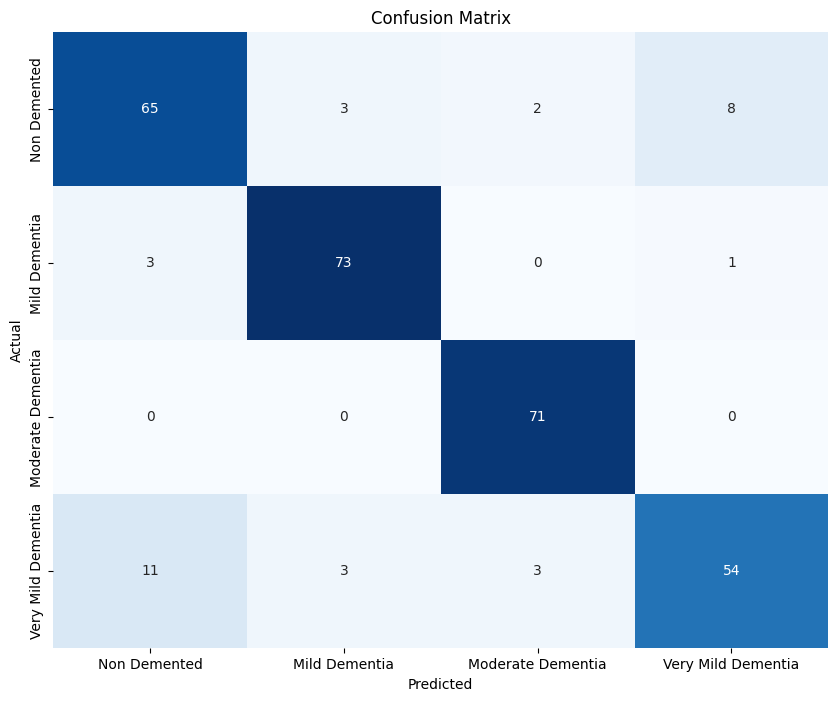

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        78
           1       0.92      0.95      0.94        77
           2       0.93      1.00      0.97        71
           3       0.86      0.76      0.81        71

    accuracy                           0.89       297
   macro avg       0.88      0.89      0.88       297
weighted avg       0.88      0.89      0.88       297



In [186]:
# Make predictions using the model
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non Demented','Mild Dementia','Moderate Dementia','Very Mild Dementia'],  
            yticklabels=['Non Demented','Mild Dementia','Moderate Dementia','Very Mild Dementia'])  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display the classification report
print(classification_report(y_true, y_pred_classes))

# <b><font color ='#163361'> Prediction </b></font>

In [169]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia    

100.0% Confidence This Is Moderate Dementia


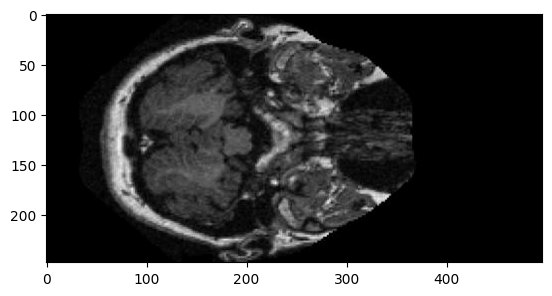

In [170]:
from matplotlib.pyplot import imshow
img = Image.open(r'/kaggle/input/imagesoasis/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

99.99819993972778% Confidence This Is Very Mild Dementia


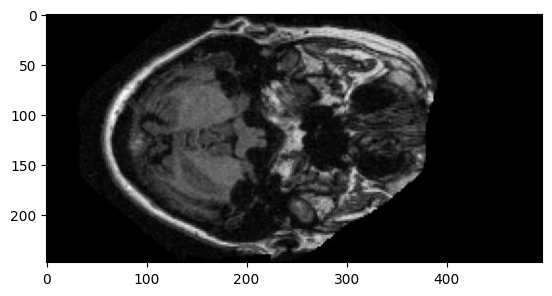

In [171]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_117.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

99.42692518234253% Confidence This Is Very Mild Dementia


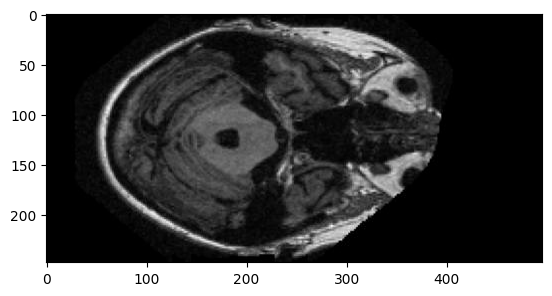

In [173]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Very mild Dementia/OAS1_0003_MR1_mpr-2_125.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

37.52977252006531% Confidence This Is Moderate Dementia


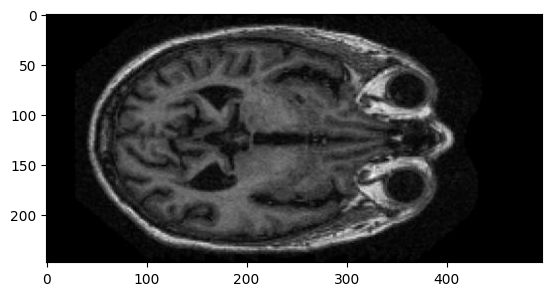

In [174]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0001_MR1_mpr-3_124.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

92.49537587165833% Confidence This Is Mild Dementia


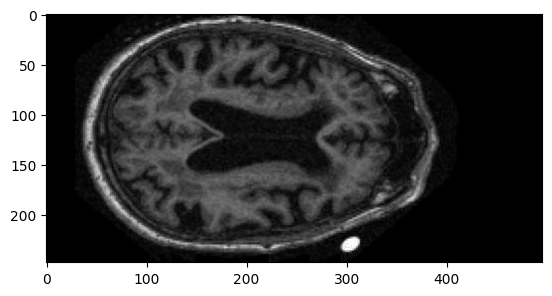

In [175]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Mild Dementia/OAS1_0031_MR1_mpr-3_150.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

87.05713748931885% Confidence This Is Non Demented


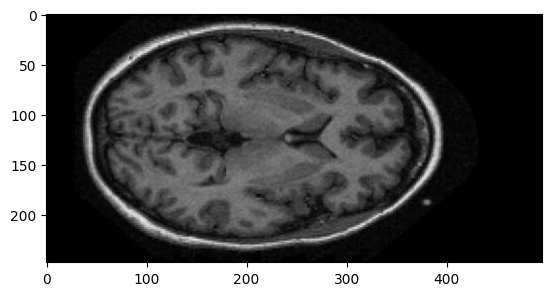

In [176]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0002_MR1_mpr-3_152.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))


84.9989116191864% Confidence This Is Non Demented


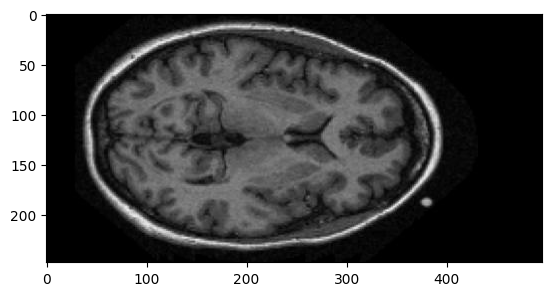

In [177]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0002_MR1_mpr-3_153.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))
